# 15.1: Double Integrals (Over a rectangular region)

### Review

Before getting into the concept of more than one integral, let's do a brief review of how a single integral is defined. When we have the following integral:

$$\int_a^bf(x)dx$$

We think of this as the integral of $f(x)$ over the interval $a\leq x \leq b$ (Assuming $a < b$)

When deriving the definition of a definite integral, we considered it to be an evaluation of the area under the curve $f(x)$, and we broke up the interval into $n$ subintervals of width $\Delta x$


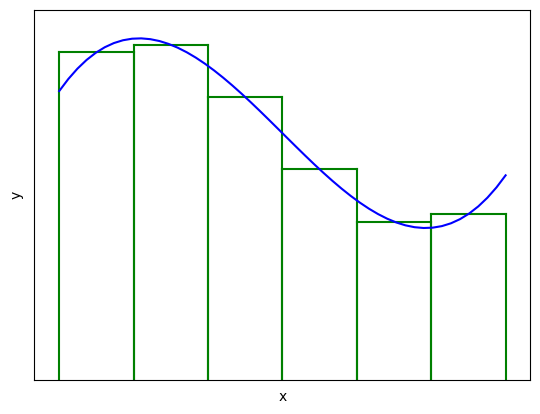

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x-1)**3-x+2

xarr = np.linspace(.1,1.9,50)
arr = np.arange(.25,2.05,.3)

for i in arr:
    linesy = np.linspace(0,f(i),5)
    linesx1 = np.linspace(i-.15,i-.15,5)
    linesx2 = np.linspace(i+.15,i+.15,5)
    plt.plot(linesx1,linesy,"-g")
    plt.plot(linesx2,linesy,"-g")
    plt.plot((i-.15,i+.15),(f(i),f(i)),"-g")

plt.plot(xarr,f(xarr),"-b",label="f(x)")
plt.axis([0, 2, 0, 1.5])
plt.xticks([])
plt.yticks([])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Each shown rectangle has height $f(x_i)$, where $x_i$ is the midpoint of each rectangle. We can use these rectangles to approximate the area under the curve:

$$A \approx f(x_1)\Delta x + f(x_2)\Delta x + \cdots + f(x_n)\Delta x$$

We can then take the limit as $n$ goes to infinity to get the exact area, which is the definition of a definite integral:

$$\int_a^b f(x)dx = \lim_{n\to\infty} \sum_{i=1}^n f(x_i)\Delta x$$

### Double integrals

Now, how can we extend this definition so that we are able to integrate a function of two variables, $f(x,y)$? Previously, we integrated over an interval in $\mathbb{R}$, so it makes sense that with two input variables we should integrate over a region in $\mathbb{R}^2$

For this section, we will deal only with a rectangular region, which we will denote as $R = [a,b] \times [c,d]$, meaning that the $x$ range is $a\leq x\leq b$, and the y range is $c\leq y \leq d$

Pictured below is the graph of a surface $S$ (blue), created by graphing the function $f(x,y)$ over the rectangular region $R$ (yellow)

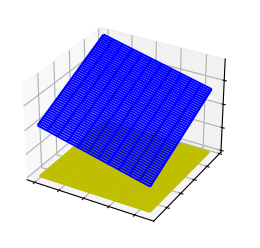

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')


x = np.arange(12)
y = np.linspace(12, 1)

x, y = np.meshgrid(x, y)

z = -(1/4)*(x)*2+(1/4)*y*3+10
R = 0*x

ax.plot_wireframe(x, y, R, color="y")
ax.plot_wireframe(x, y, z, color="blue")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

We can begin by looking at a way to approximate the volume under $S$ that is similar to how we approximated the area under $f(x)$ above

Let's divide our region $R$ into smaller rectangular subregions by dividing $a\leq x\leq b$ into $n$ subintervals and $c\leq y \leq d$ into $m$ subintervals

Now we can create a rectangular box over each subregion with height $f(x_i,y_j)$, where $(x_i,y_j)$ is the midpoint of each rectangle:

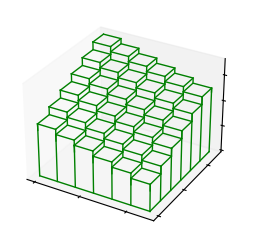

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
def f(x,y):
    return -(1/4)*(x)*2+(1/4)*y*3+10
d = 1

x1 = np.arange(d,12+d,2*d)
y1 = np.arange(d,12+d,2*d)

ax.plot((0,12),(0,0),(0,0), color="green", linewidth="1")
ax.plot((12,12),(0,12),(0,0), color="green", linewidth="1")
ax.plot((12,12),(12,12),(0,f(12-d,12-d)), color="green", linewidth="1")
for i in x1:
    ax.plot((i-d,i-d),(0,0),(0,f(i,d)), color="green", linewidth="1")
    ax.plot((i+d,i+d),(12,12),(f(i+3*d,12),f(i+2*d,12)), color="green", linewidth="1")    
for j in y1:
    ax.plot((12,12),(j-d,j-d),(0,f(12-d,j)), color="green", linewidth="1")
for i in x1:
    for j in y1:
            ax.plot((i-d,i+d),(j+d,j+d),(f(i,j),f(i,j)), color="green", linewidth="1")
            ax.plot((i+d,i+d),(j-d,j+d),(f(i,j),f(i,j)),color="green", linewidth="1")
            ax.plot((i-d,i-d),(j-d,j+d),(f(i,j),f(i,j)),color="green", linewidth="1")
            ax.plot((i-d,i+d),(j-d,j-d),(f(i,j),f(i,j)),color="green", linewidth="1")
            ax.plot((i-d,i-d),(j-d,j-d),(f(i+d,j-d),f(i,j)), color="green", linewidth="1")
            ax.plot((i+d,i+d),(j-d,j-d),(f(i+d,j-d),f(i,j)), color="green", linewidth="1")
            

ax.grid(False)            
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

We will call the area of each rectangular base $\Delta A$, and we know that their heights are given by $f(x_i,y_i)$. So the volume of an individual box is $f(x_i, y_i)\Delta A$ Based on this, we can approximate the volume under our surface with the following formula:

$$V \approx \sum_{i = 1}^n {\sum_{j = 1}^m {f({x_i,y_j})\,\Delta  A}} $$

But this is just an approximation. To calculate the actual value, we once again turn to limits:

$$V = \lim_{n,m\to\infty}\sum_{i = 1}^n {\sum_{j = 1}^m {f({x_i,y_j})\,\Delta  A}} $$

This is very similar to our definition of an integral of a single variable function, which makes sense because this is in fact the definition of a double integral of $f(x,y)$ over a region $R$:

$$\iint_R f(x,y)dA = \lim_{n,m\to\infty}\sum_{i = 1}^n {\sum_{j = 1}^m {f({x_i,y_j})\,\Delta  A}} $$

Now, how can we go about actually calculating these integrals?

### Fubini's Theorem

The following theorem is what we use to calculate double integral's over rectangular regions, denoted by $R: a\leq x\leq b, \ c\leq y\leq d$

$$\iint_R f(x,y)\ dA = \int_c^d\int_a^bf(x,y)\ dx\ dy = \int_a^b\int_c^df(x,y)\ dy\ dx$$

These are referred to as iterated integrals. Why? Because evaluating them consists of evaluating an integral multiple times

To evaluate an integral (using the first case as an example), we evaluate first the inner integral, and then the outer:

$$\iint_R f(x,y)\ dA = \int_c^d\left(\int_a^bf(x,y)\ dx\right)\ dy$$

We calculate: 

$$\int_a^bf(x,y)\ dx$$

By keeping y constant and computing an antiderivative of f(x,y) with respect to x and then evaluating it over the interval $[a,b]$. This is a very similar process to how partial derivatives are computed. This will leave us with a function in terms of only y, which we then integrate with respect to y to calculate our final answer

Important: Note that the outer differential corresponds with the outer integral, and the inner with the inner. You can evaluate the integral in either order, but the differentials must match up.

### Example

This topic is not overly complicated, so only a single simple example will be provided to demonstrate the mechanism of Fubini's theorem. 

$$\iint_R 6x^2y\ dA\text{, }R: 2\leq x\leq 3\text{, }1\leq y\leq 2$$

We will begin by integrating with respect to x first:

$$\text{Apply Fubini's theorem: } \int_1^2\int_2^36x^2y\ dx\ dy$$

$$\text{Evaluate inner integral: } \int_1^2\left(2x^3y\right)_2^3\ dy$$

$$\int_1^2(54y-16y)\ dy$$

$$\text{Evaluate outer integral: }\int_1^238y\ dy$$

$$\left(19y^2\right)_1^2 = 76-19 = 57$$

Now in the opposite order, with respect to y first:

$$\text{Apply Fubini's theorem: } \int_2^3\int_1^26x^2y\ dy\ dx$$

$$\text{Evaluate inner integral: } \int_2^3\left(3x^2y^2\right)_1^2\ dx$$

$$\int_2^3(12x^2-3x^2)\ dx$$

$$\text{Evaluate outer integral: }\int_2^39x^2\ dx$$

$$\left(3x^3\right)_2^3 = 81 - 24 = 57$$

We see that the same result is computed each time, and that we can trust the fact that the order in which you perform the integrals does not matter. 

In the next section, more general regions and a stronger form of Fubini's theorem will be discussed
